In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2didi9EZXNjcmlwdGlvbl9vZl90aGVfbmF0aW9uYWxfZWxlY3RyaWNfc3lzdGVtX2luX01leGljbw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/importlib/_bootstrap.py": 1764980585.2781239, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/importlib/_bootstrap_external.py": 1764980585.2784855, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/zipimport.py": 1764980585.4382508, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/codecs.py": 1764980585.135486, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/encodings/aliases.py": 1764980585.153898, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/encodings/__init__.py": 1764980585.153706, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/encodings/utf_8.py": 1764980585.170294, "/Users/gbv/.local/share/uv/python/cpython-3.13.9-macos-x86_64-none/lib/python3.13/abc.py": 1764980585.1271904, "/Users/gbv/.l

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12, 'figure.dpi': 110})

regiones = pd.read_parquet("data/demanda_utci_regions.parquet")
ciudades = pd.read_parquet("data/demanda_utci_ciudades.parquet")

print(f"Regiones: {regiones.shape}  |  Ciudades: {ciudades.shape}")
print(f"Periodo regiones: {regiones.index.min()} → {regiones.index.max()}")
regiones.head(3)

Regiones: (63432, 18)  |  Ciudades: (70129, 18)
Periodo regiones: 2016-01-27 00:00:00 → 2023-04-22 23:00:00


PEN_DEMANDA  BC_DEMANDA  CEN_DEMANDA  N_DEMANDA  \
index                                                                  
2016-01-27 00:00:00          NaN     1082.12          NaN        NaN   
2016-01-27 01:00:00          NaN     1043.58          NaN        NaN   
2016-01-27 02:00:00          NaN     1018.07          NaN        NaN   

                     NE_DEMANDA  NO_DEMANDA  OCC_DEMANDA  ORI_DEMANDA  \
index                                                                   
2016-01-27 00:00:00         NaN         NaN          NaN          NaN   
2016-01-27 01:00:00         NaN         NaN          NaN          NaN   
2016-01-27 02:00:00         NaN         NaN          NaN          NaN   

                     BCS_DEMANDA   BC_UTCI  BCS_UTCI  CEN_UTCI    N_UTCI  \
index                                                                      
2016-01-27 00:00:00          NaN -3.379517  2.859832  9.642411 -6.907598   
2016-01-27 01:00:00          NaN -3.599843  2.410718  9.085258 -6.709591   
2016-01-27 02:00:00          NaN -3.694112  2.070400  8.425376 -6.564832   

                      NE_UTCI   NO_UTCI  OCC_UTCI   ORI_UTCI   PEN_UTCI  
index                                                                    
2016-01-27 00:00:00  0.171516  0.878032  5.045988  15.810595  20.761044  
2016-01-27 01:00:00 -0.870113  0.279699  4.707579  15.511235  21.115858  
2016-01-27 02:00:00 -1.034441 -0.391193  4.360694  15.066113  21.235109

In [3]:
cols_dem = [c for c in regiones.columns if "DEMANDA" in c]
cols_utci = [c for c in regiones.columns if "UTCI" in c]

print("Columnas de demanda:", cols_dem)
print("Columnas de UTCI:   ", cols_utci)
print(f"\nNulos por columna:\n{regiones[cols_dem].isnull().sum()}")

Columnas de demanda: ['PEN_DEMANDA', 'BC_DEMANDA', 'CEN_DEMANDA', 'N_DEMANDA', 'NE_DEMANDA', 'NO_DEMANDA', 'OCC_DEMANDA', 'ORI_DEMANDA', 'BCS_DEMANDA']
Columnas de UTCI:    ['BC_UTCI', 'BCS_UTCI', 'CEN_UTCI', 'N_UTCI', 'NE_UTCI', 'NO_UTCI', 'OCC_UTCI', 'ORI_UTCI', 'PEN_UTCI']

Nulos por columna:
PEN_DEMANDA     103
BC_DEMANDA       32
CEN_DEMANDA     103
N_DEMANDA       103
NE_DEMANDA      103
NO_DEMANDA      103
OCC_DEMANDA     103
ORI_DEMANDA     103
BCS_DEMANDA    1399
dtype: int64


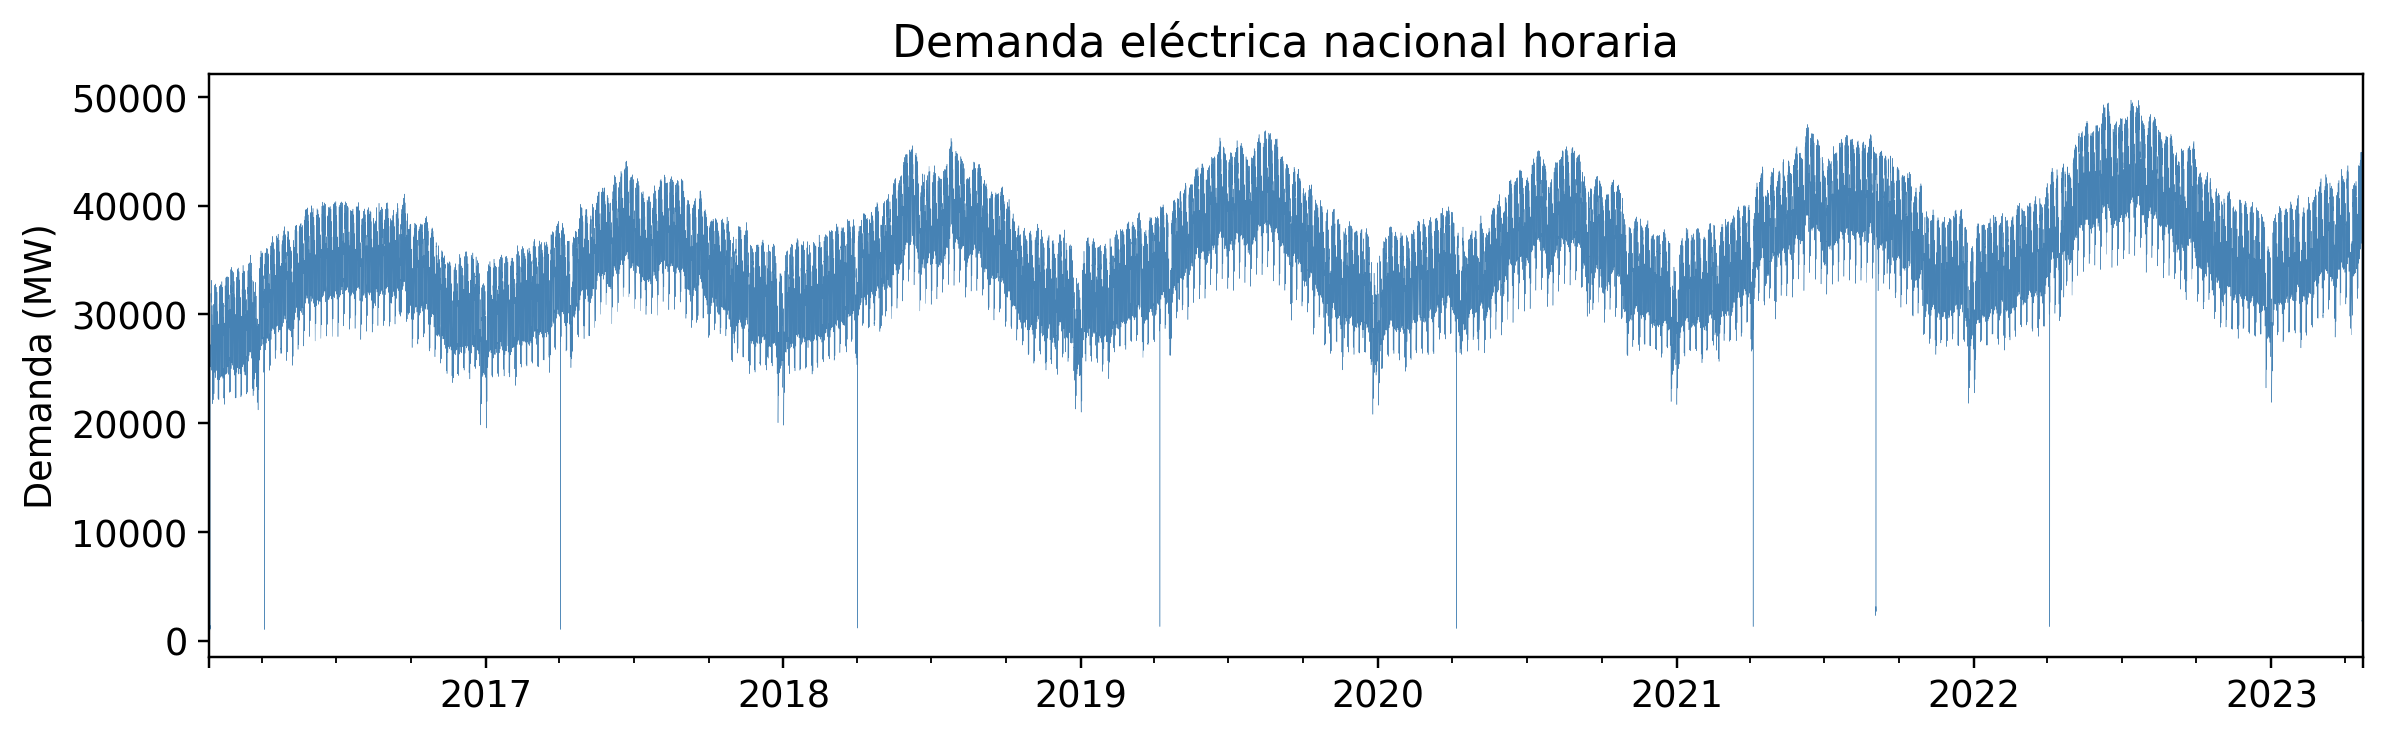

In [4]:
regiones["NAL_DEMANDA"] = regiones[cols_dem].sum(axis=1)

fig, ax = plt.subplots(figsize=(11, 3.5))
regiones["NAL_DEMANDA"].plot(ax=ax, linewidth=0.15, color="steelblue")
ax.set_ylabel("Demanda (MW)")
ax.set_title("Demanda eléctrica nacional horaria")
ax.set_xlabel("")
plt.tight_layout()
plt.show()

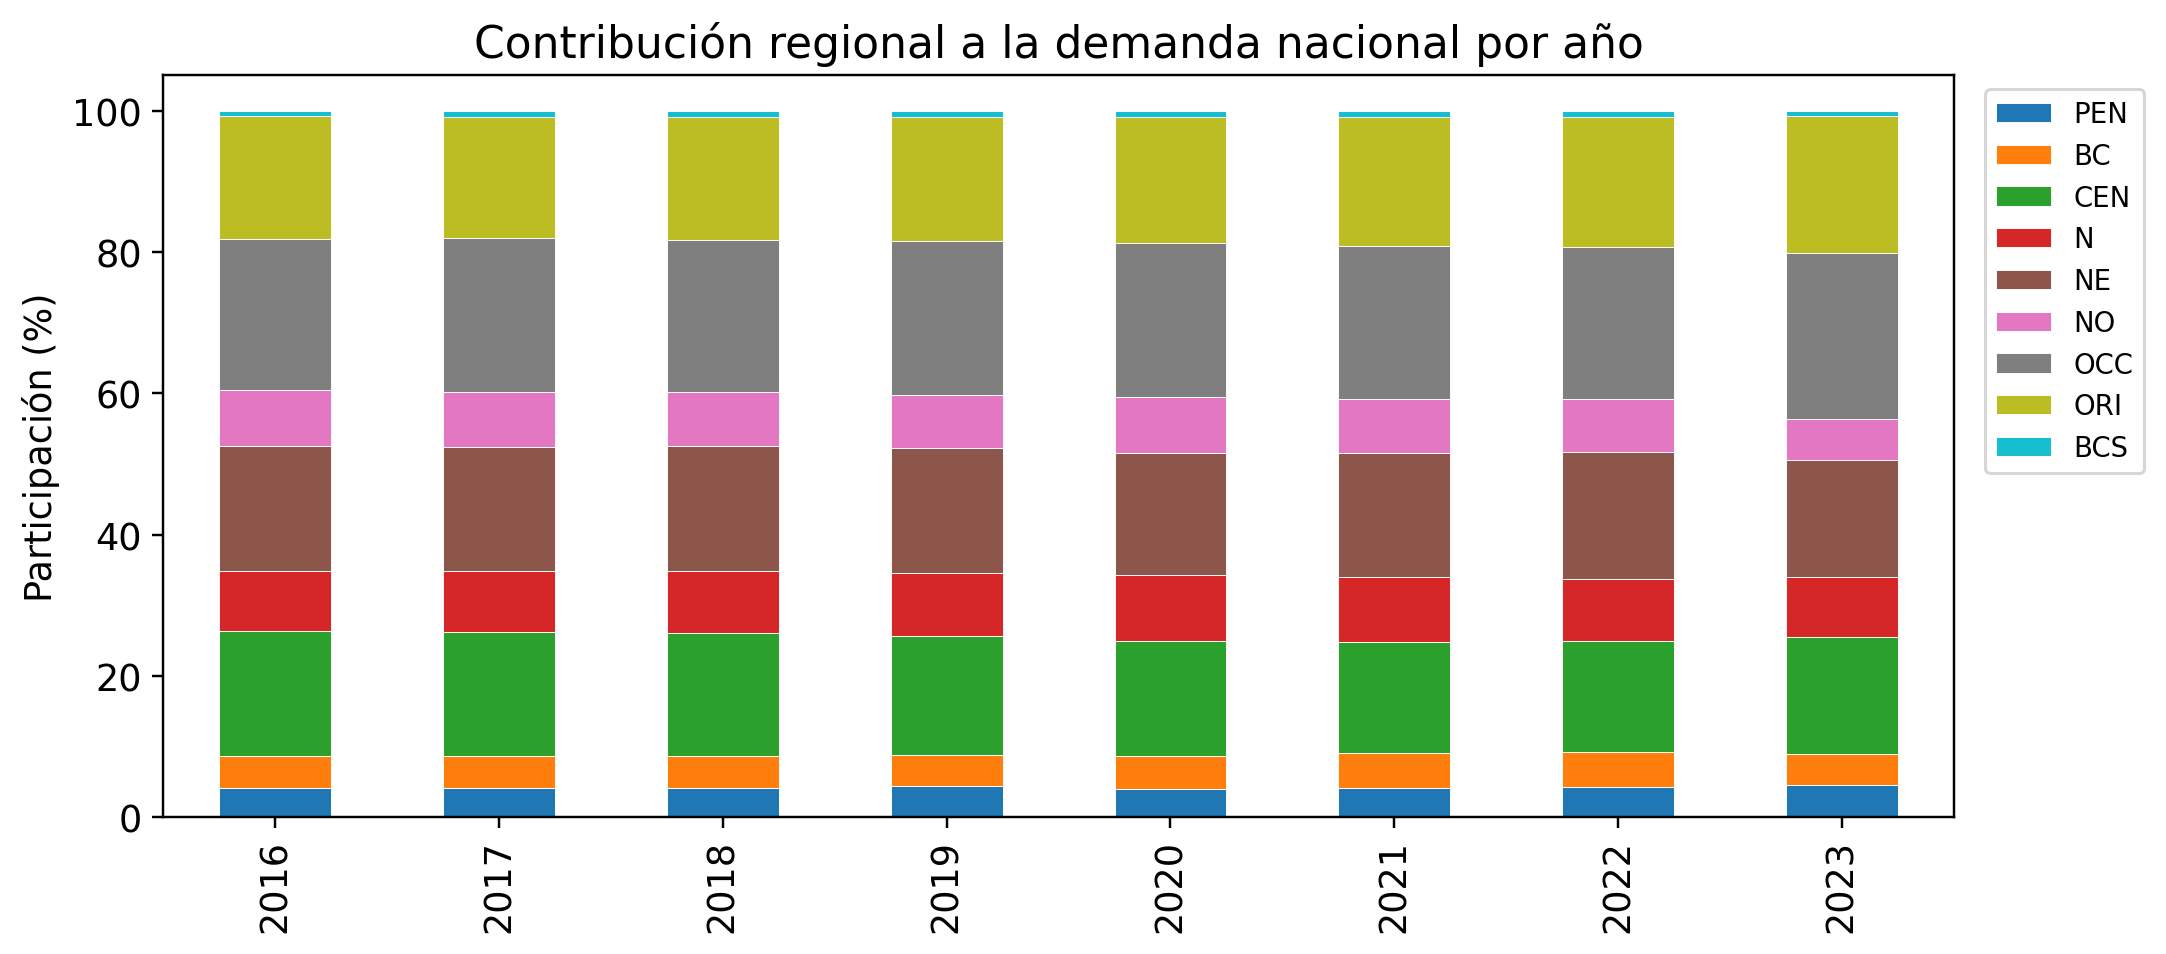

In [5]:
regiones["year"] = regiones.index.year
anual = regiones.groupby("year")[cols_dem].sum()
pct = anual.div(anual.sum(axis=1), axis=0) * 100
pct.columns = [c.replace("_DEMANDA", "") for c in pct.columns]

fig, ax = plt.subplots(figsize=(10, 4.5))
pct.plot(kind="bar", stacked=True, ax=ax, colormap="tab10", edgecolor="white", linewidth=0.3)
ax.set_ylabel("Participación (%)")
ax.set_title("Contribución regional a la demanda nacional por año")
ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=9)
ax.set_xlabel("")
plt.tight_layout()
plt.show()

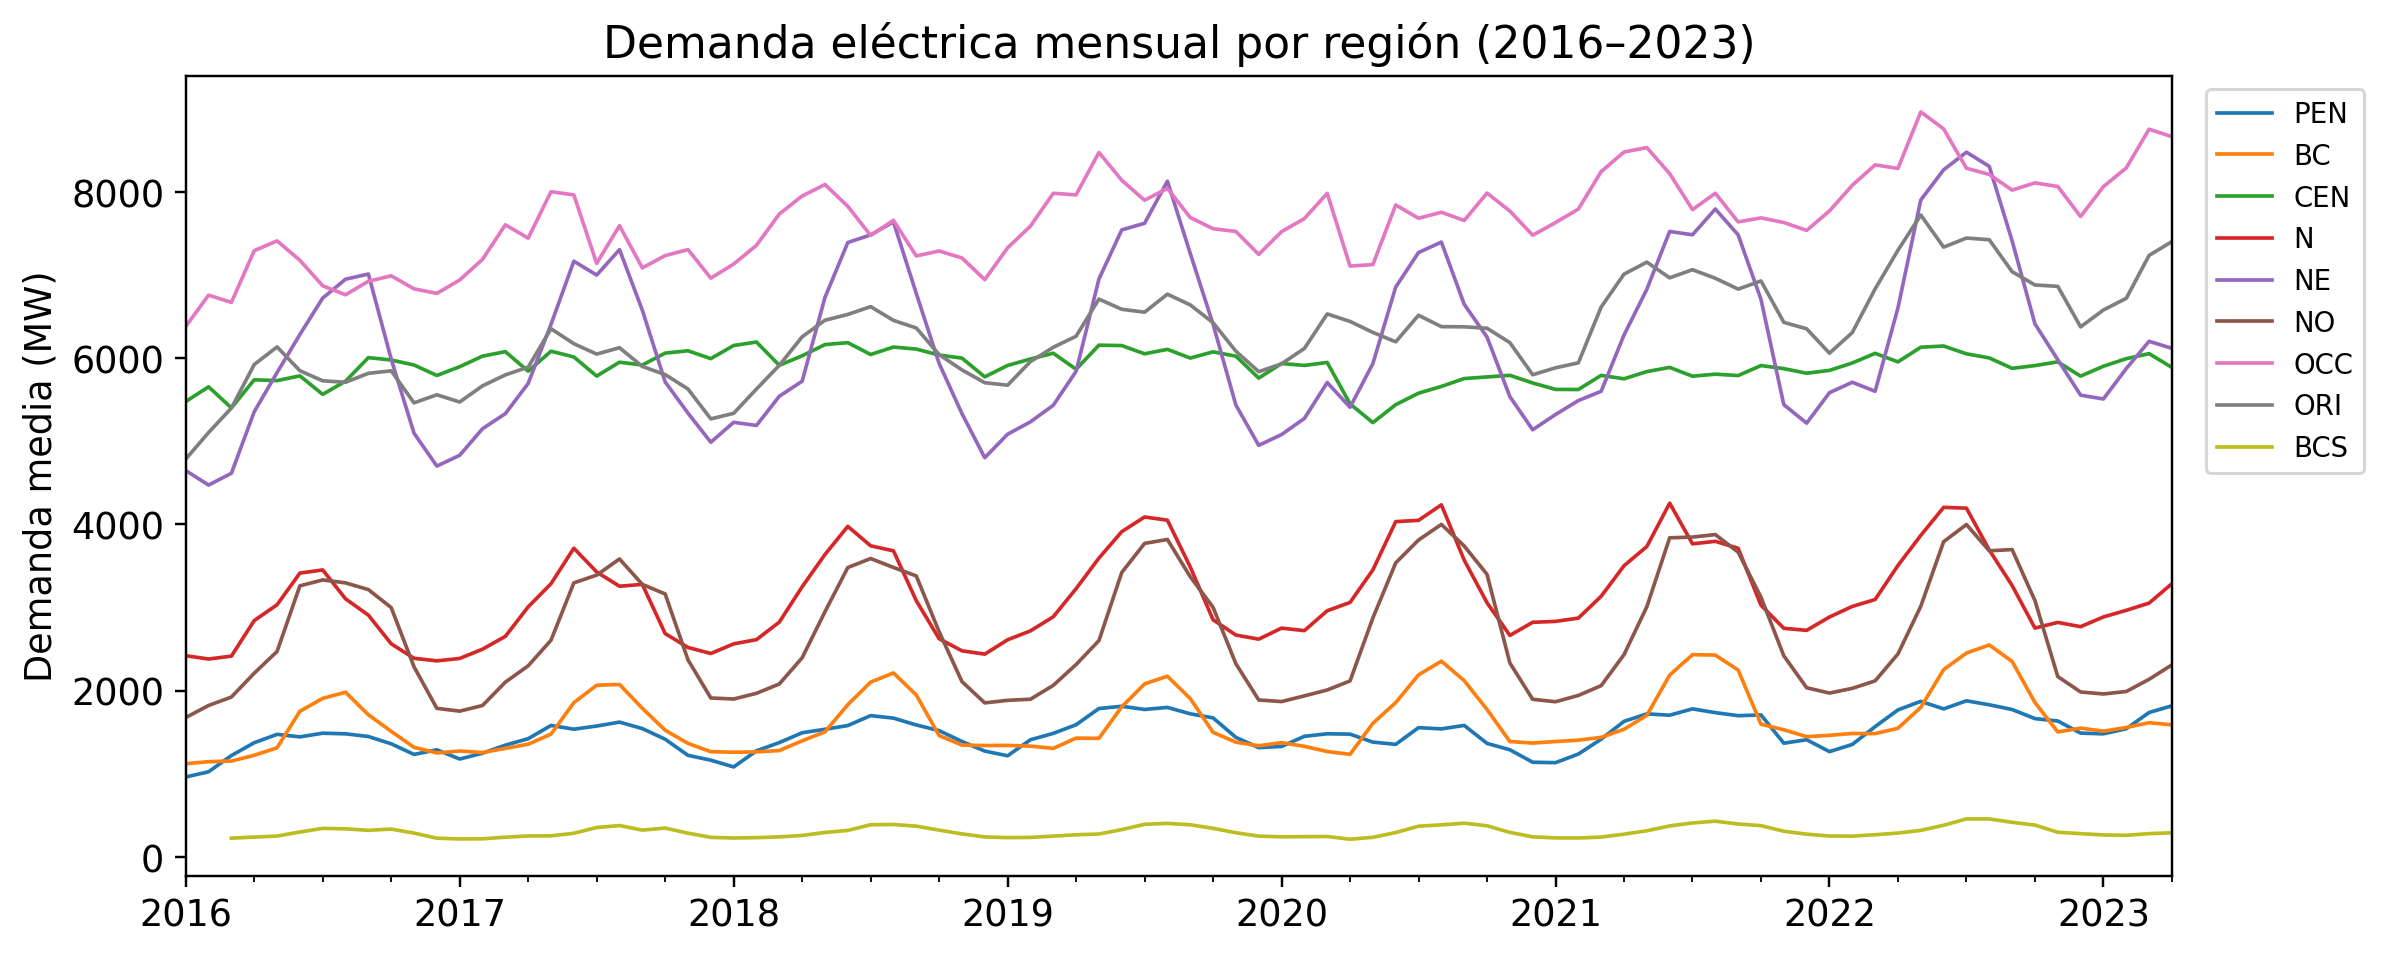

In [6]:
monthly = regiones[cols_dem].resample("ME").mean()
monthly.columns = [c.replace("_DEMANDA", "") for c in monthly.columns]

fig, ax = plt.subplots(figsize=(11, 4.5))
monthly.plot(ax=ax, linewidth=1.2)
ax.set_ylabel("Demanda media (MW)")
ax.set_title("Demanda eléctrica mensual por región (2016–2023)")
ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=9)
ax.set_xlabel("")
plt.tight_layout()
plt.show()

In [7]:
from scipy.signal import welch

def power_spectrum(series, fs=1.0, nperseg=8760):
    """Calcula el espectro de potencia usando el método de Welch."""
    clean = series.dropna().values
    freqs, psd = welch(clean, fs=fs, nperseg=min(nperseg, len(clean)//2),
                       scaling='density')
    return freqs, psd

def plot_spectrum(freqs, psd, title="", ax=None):
    """Grafica el espectro con marcadores en los ciclos principales."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 3.5))
    period_h = 1.0 / freqs[1:]
    ax.loglog(period_h, psd[1:], linewidth=0.8)
    for tau, label in [(8766, "1 año"), (168, "1 sem"), (24, "1 día"), (12, "12 h")]:
        ax.axvline(tau, color="red", linestyle="--", alpha=0.5, linewidth=0.7)
    ax.set_xlabel("Periodo (horas)")
    ax.set_ylabel("PSD")
    ax.set_title(title)
    return ax

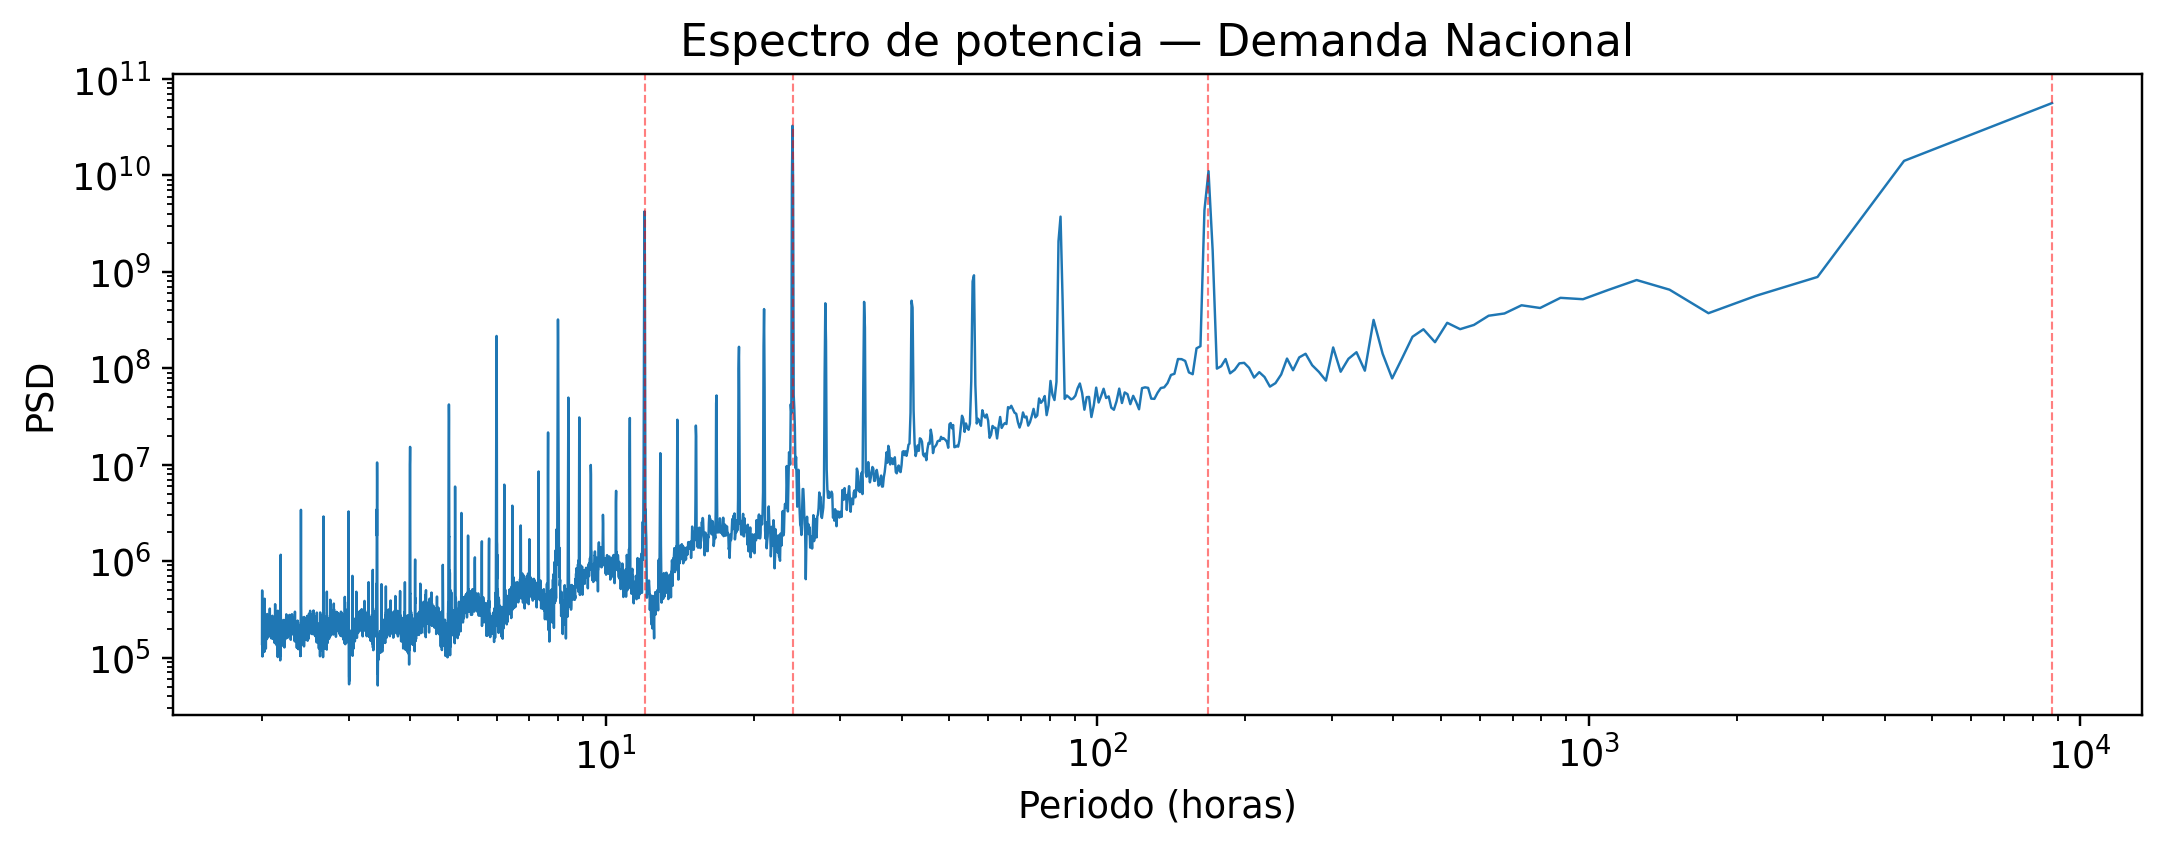

In [8]:
freqs, psd = power_spectrum(regiones["NAL_DEMANDA"], fs=1.0)

fig, ax = plt.subplots(figsize=(10, 4))
plot_spectrum(freqs, psd, title="Espectro de potencia — Demanda Nacional", ax=ax)
plt.tight_layout()
plt.show()

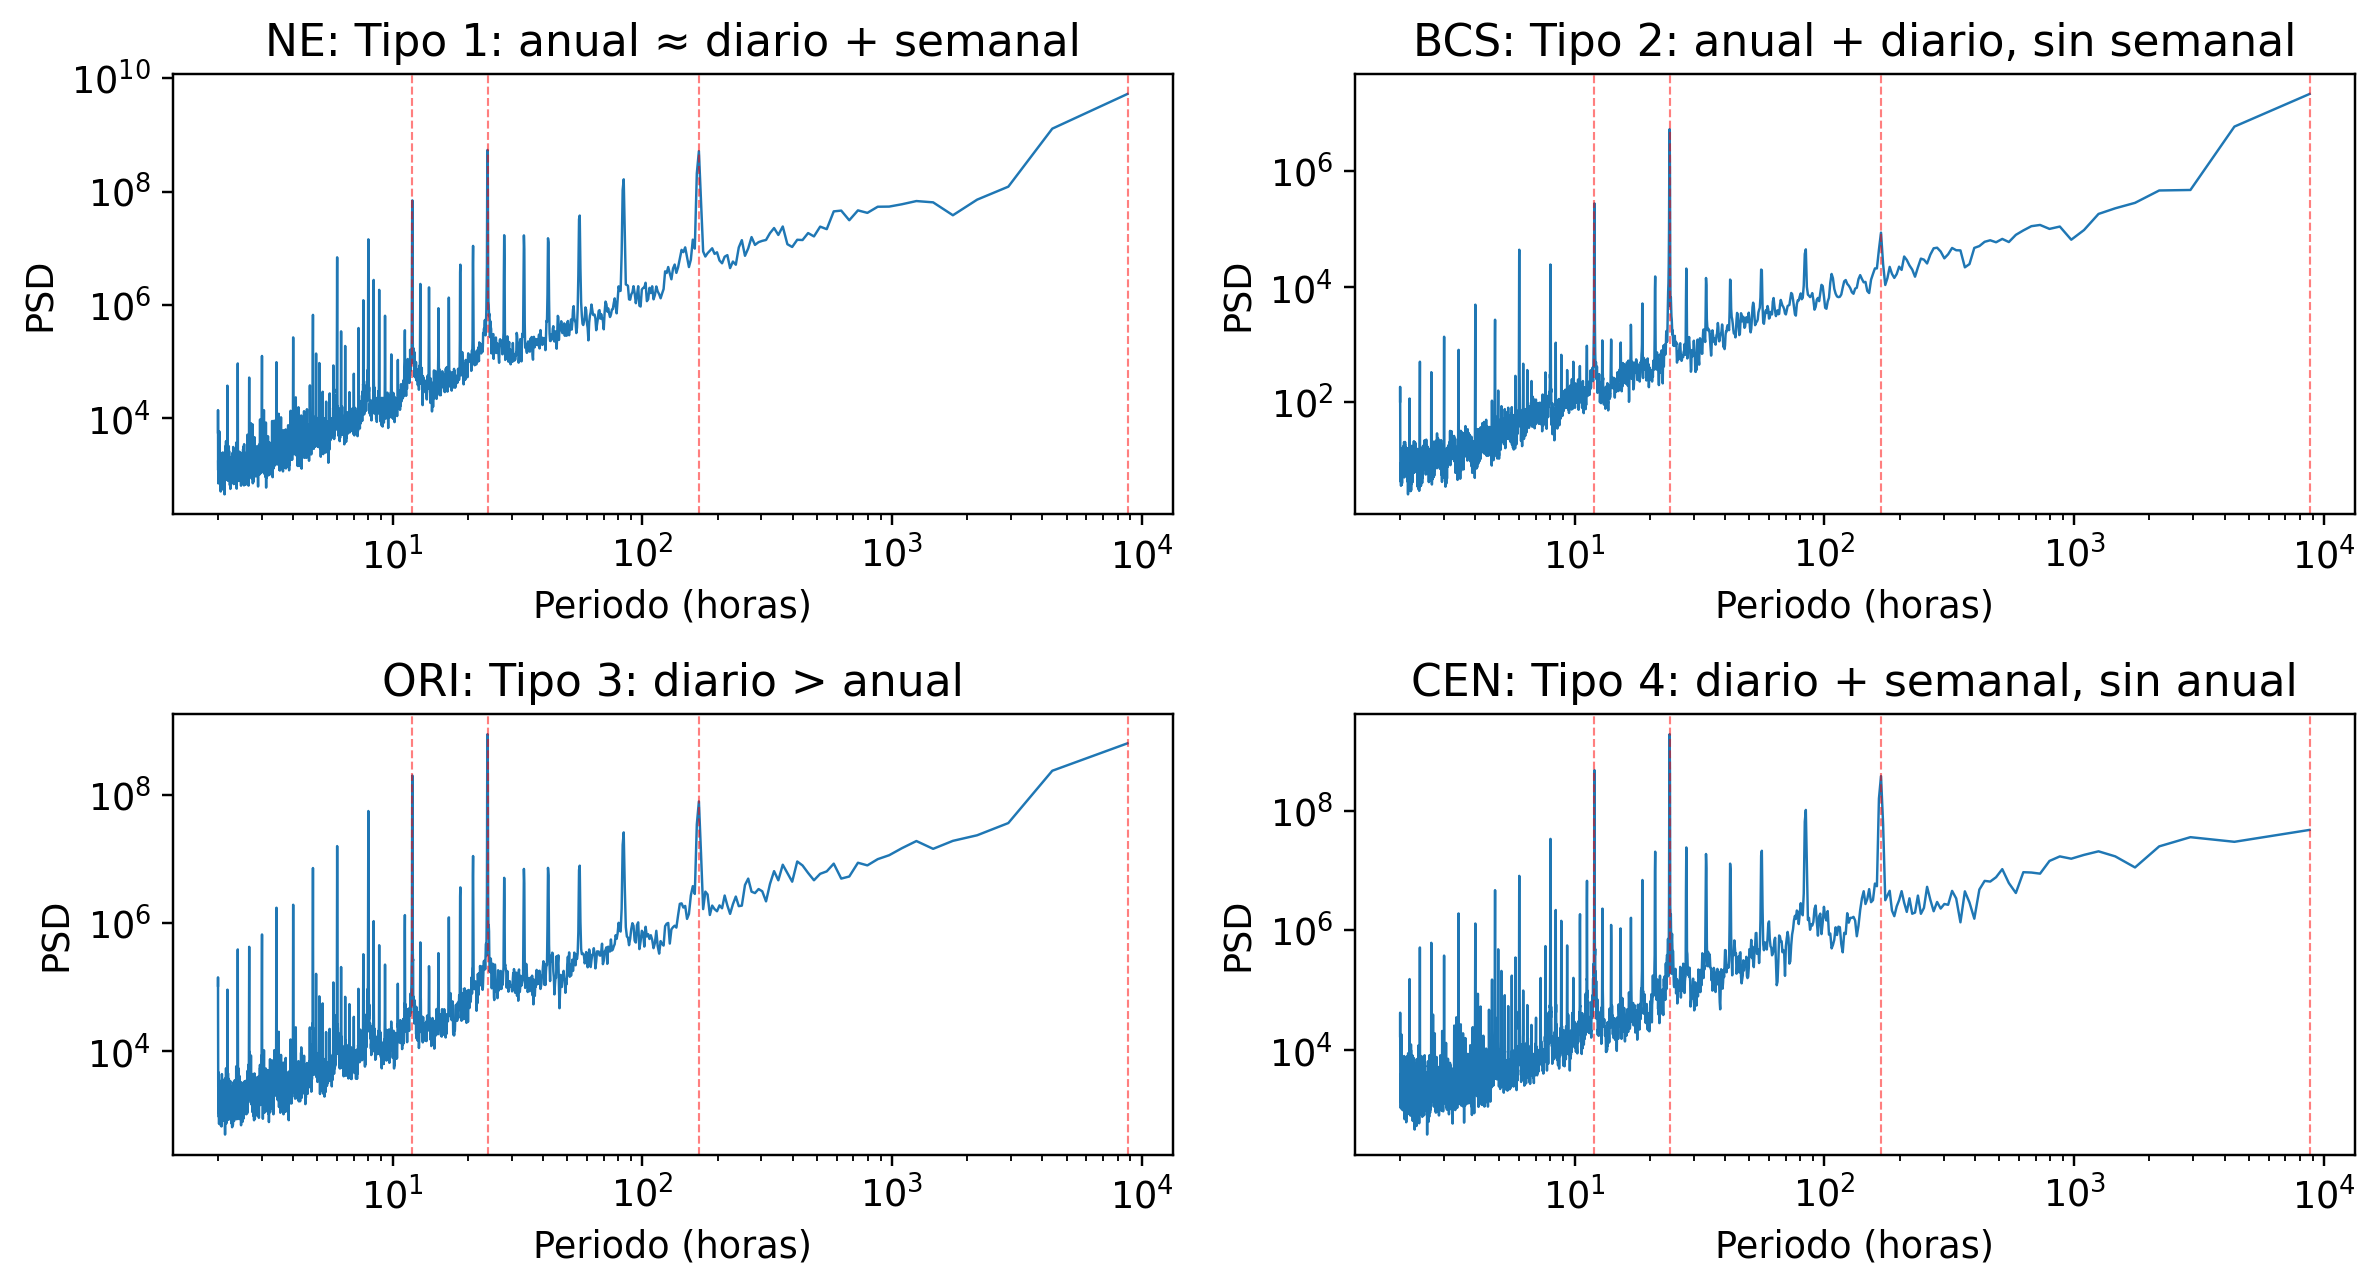

In [9]:
ejemplos = {"NE": "Tipo 1: anual ≈ diario + semanal",
            "BCS": "Tipo 2: anual + diario, sin semanal",
            "ORI": "Tipo 3: diario > anual",
            "CEN": "Tipo 4: diario + semanal, sin anual"}

fig, axes = plt.subplots(2, 2, figsize=(11, 6))
for ax, (reg, desc) in zip(axes.flat, ejemplos.items()):
    f, p = power_spectrum(regiones[f"{reg}_DEMANDA"], fs=1.0)
    plot_spectrum(f, p, title=f"{reg}: {desc}", ax=ax)
plt.tight_layout()
plt.show()

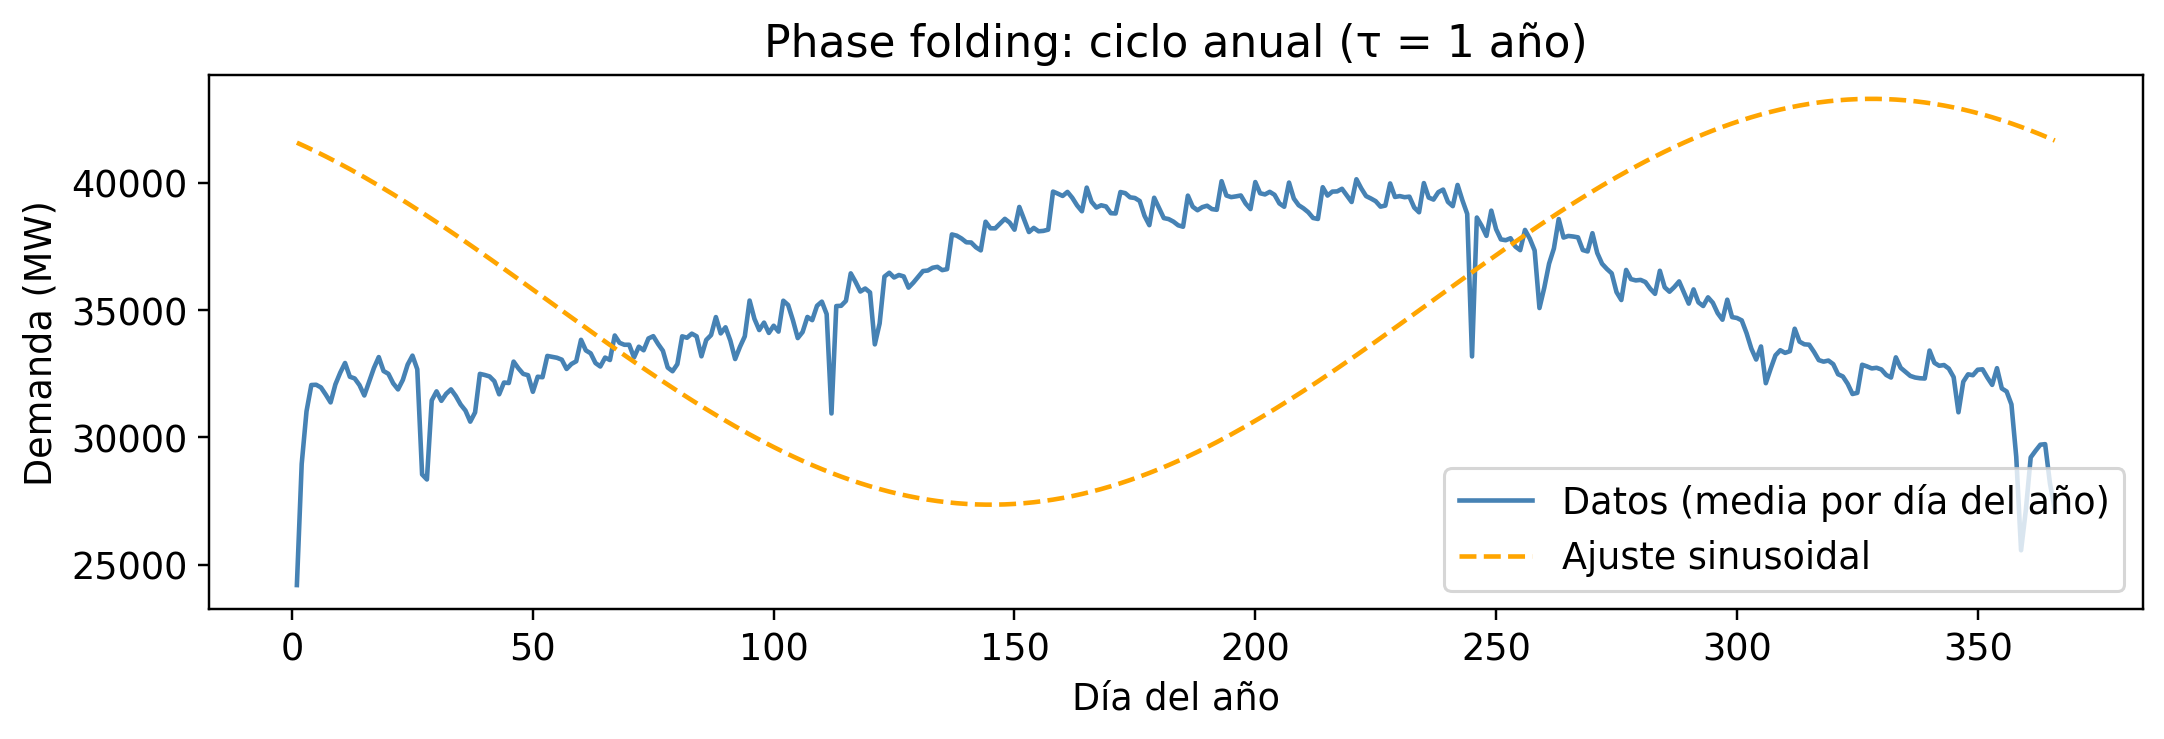

In [10]:
dem = regiones["NAL_DEMANDA"].dropna().copy()
dem.index = pd.to_datetime(dem.index)

# Ciclo anual: agrupar por día del año
dem_doy = dem.groupby(dem.index.dayofyear).mean()

fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(dem_doy.index, dem_doy.values, color="steelblue", label="Datos (media por día del año)")
# Ajuste sinusoidal
x = np.arange(1, 367)
A = (dem_doy.max() - dem_doy.min()) / 2
offset = dem_doy.mean()
phase = dem_doy.idxmax() / 366 * 2 * np.pi
fit = A * np.sin(2 * np.pi * x / 366 - np.pi/2 + phase) + offset
ax.plot(x, fit, '--', color="orange", label="Ajuste sinusoidal")
ax.set_xlabel("Día del año")
ax.set_ylabel("Demanda (MW)")
ax.set_title("Phase folding: ciclo anual (τ = 1 año)")
ax.legend()
plt.tight_layout()
plt.show()

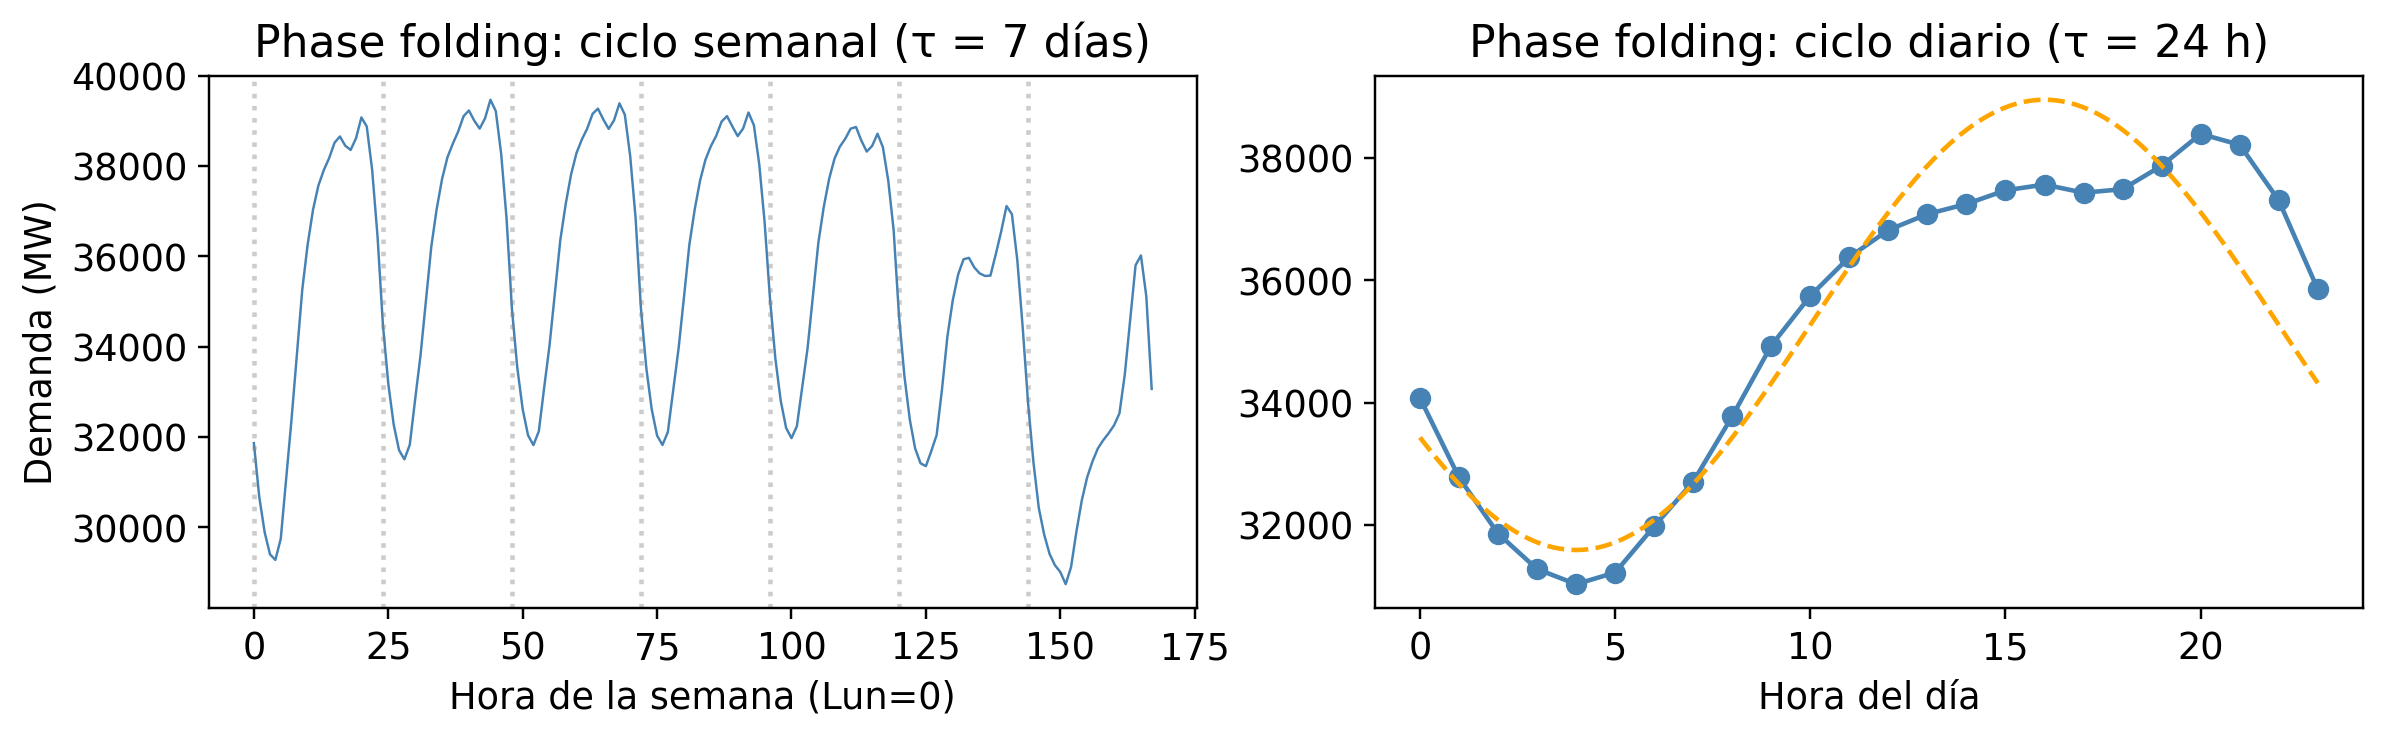

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3.5))

# Ciclo semanal
dem_dow = dem.groupby([dem.index.dayofweek, dem.index.hour]).mean()
dem_dow = dem_dow.values
hours_week = np.arange(len(dem_dow))
axes[0].plot(hours_week, dem_dow, color="steelblue", linewidth=0.8)
for d in range(0, 168, 24):
    axes[0].axvline(d, color="gray", linestyle=":", alpha=0.4)
axes[0].set_xlabel("Hora de la semana (Lun=0)")
axes[0].set_ylabel("Demanda (MW)")
axes[0].set_title("Phase folding: ciclo semanal (τ = 7 días)")

# Ciclo diario
dem_hour = dem.groupby(dem.index.hour).mean()
axes[1].plot(dem_hour.index, dem_hour.values, 'o-', color="steelblue")
x24 = np.linspace(0, 23, 200)
A24 = (dem_hour.max() - dem_hour.min()) / 2
fit24 = A24 * np.sin(2 * np.pi * x24 / 24 - np.pi/2 + (dem_hour.idxmax()/24*2*np.pi)) + dem_hour.mean()
axes[1].plot(x24, fit24, '--', color="orange")
axes[1].set_xlabel("Hora del día")
axes[1].set_title("Phase folding: ciclo diario (τ = 24 h)")

plt.tight_layout()
plt.show()

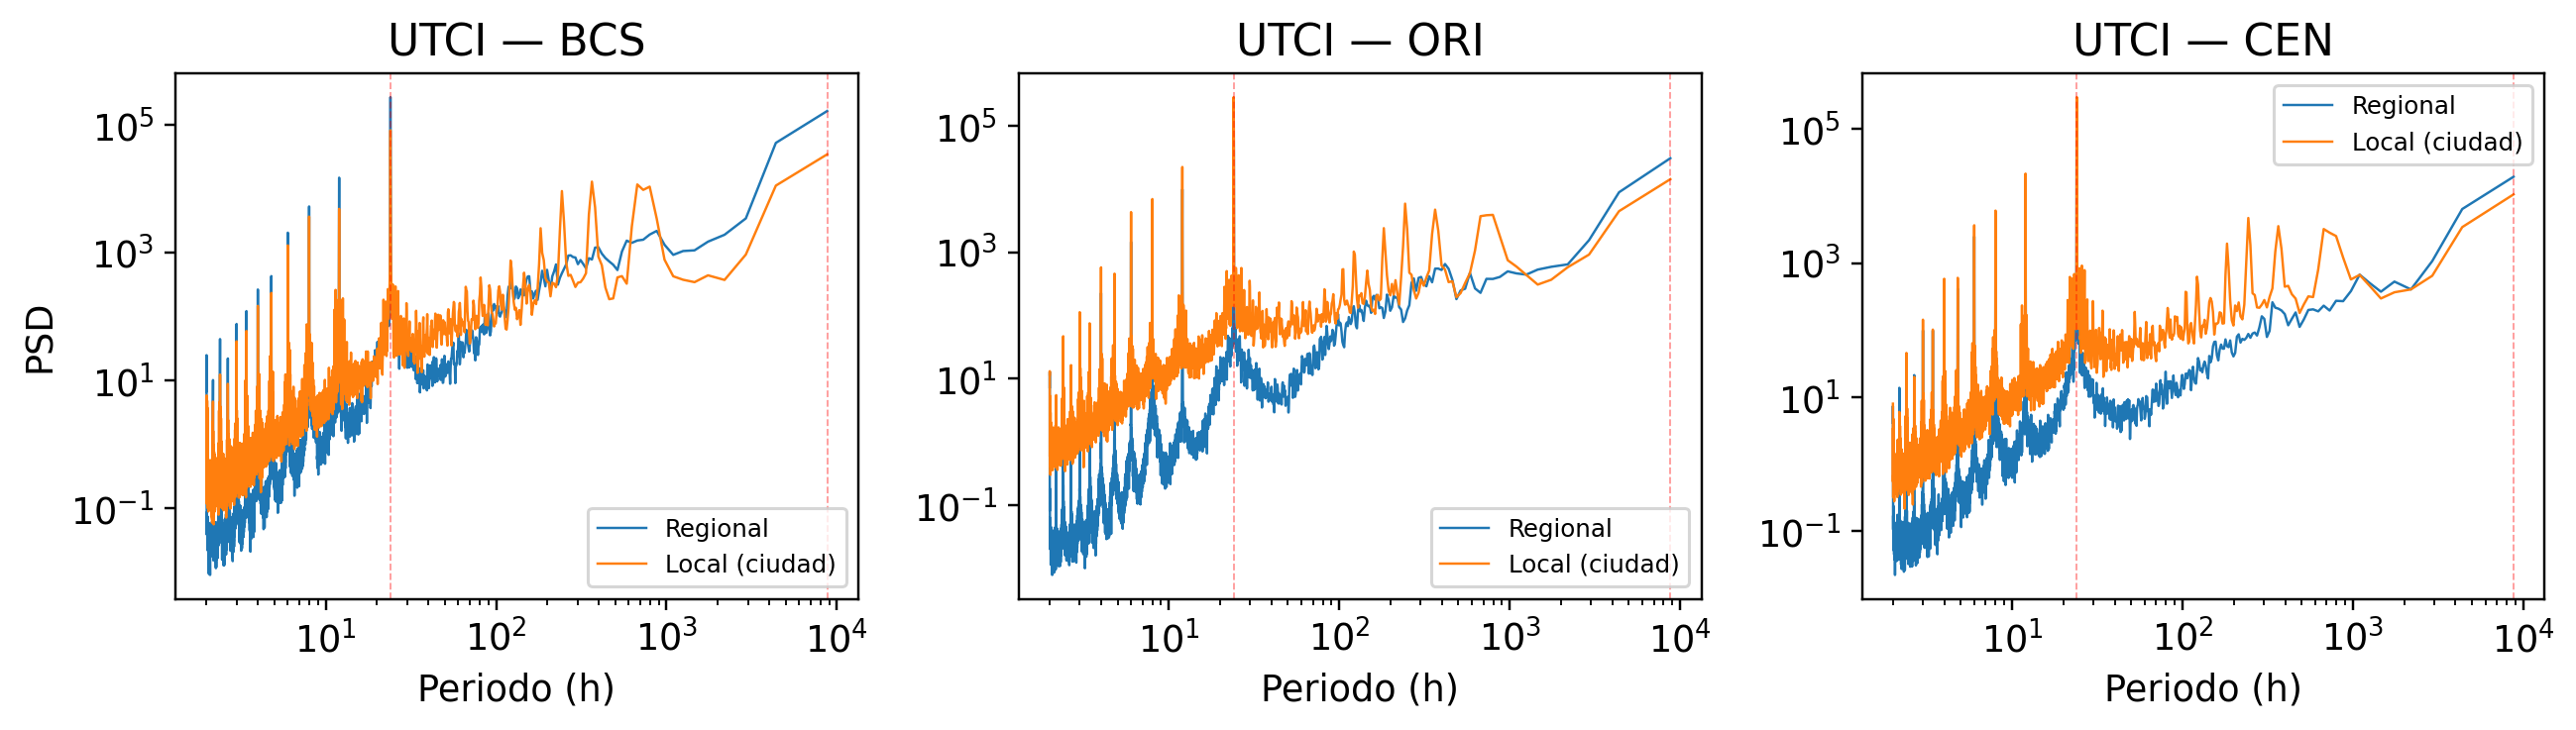

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))

for ax, reg in zip(axes, ["BCS", "ORI", "CEN"]):
    f_r, p_r = power_spectrum(regiones[f"{reg}_UTCI"], fs=1.0)
    f_c, p_c = power_spectrum(ciudades[f"{reg}_UTCI"], fs=1.0)
    period_r = 1.0 / f_r[1:]
    period_c = 1.0 / f_c[1:]
    ax.loglog(period_r, p_r[1:], linewidth=0.8, label="Regional")
    ax.loglog(period_c, p_c[1:], linewidth=0.8, label="Local (ciudad)")
    for tau in [8766, 24]:
        ax.axvline(tau, color="red", linestyle="--", alpha=0.4, linewidth=0.6)
    ax.set_title(f"UTCI — {reg}")
    ax.set_xlabel("Periodo (h)")
    ax.legend(fontsize=8)

axes[0].set_ylabel("PSD")
plt.tight_layout()
plt.show()

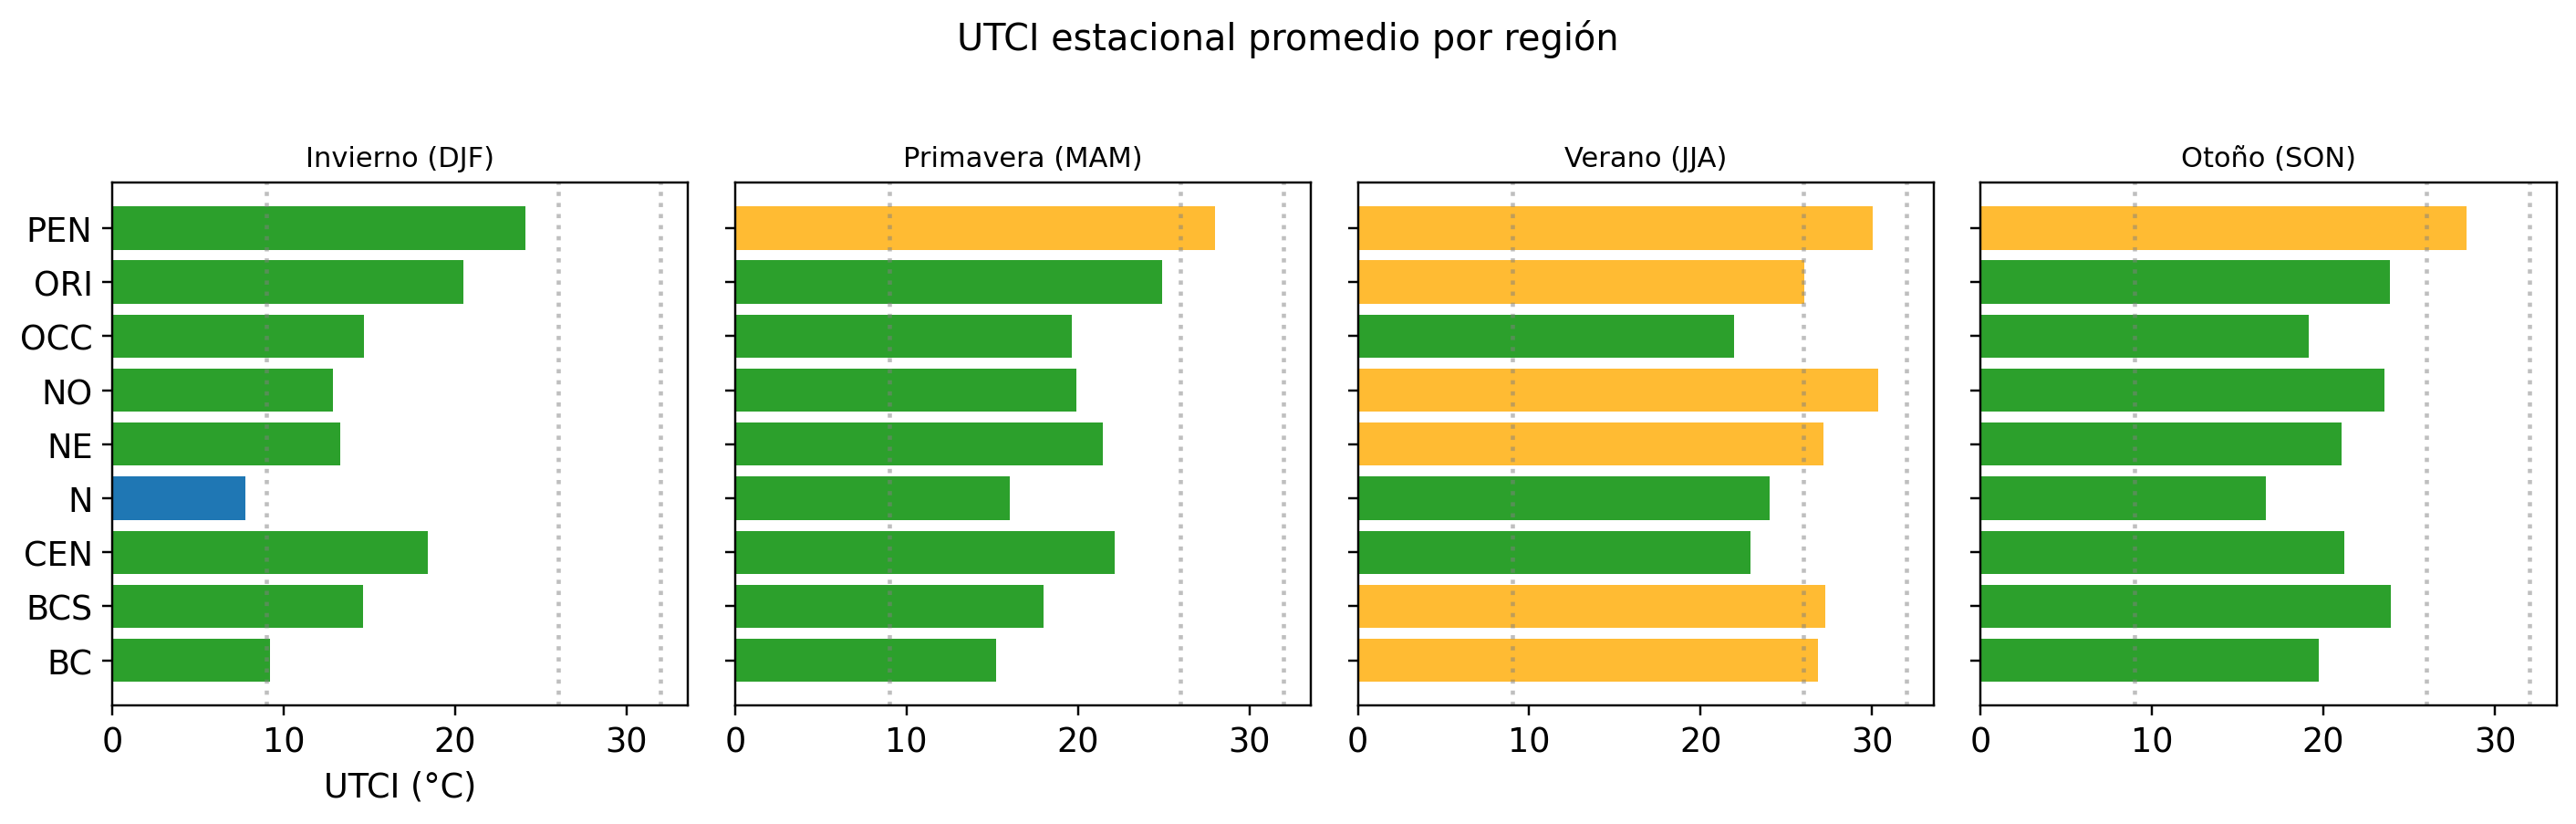

In [13]:
seasons = {"Invierno (DJF)": [12, 1, 2], "Primavera (MAM)": [3, 4, 5],
           "Verano (JJA)": [6, 7, 8], "Otoño (SON)": [9, 10, 11]}

reg_names = [c.replace("_UTCI", "") for c in cols_utci]

fig, axes = plt.subplots(1, 4, figsize=(13, 4), sharey=True)
for ax, (sname, months) in zip(axes, seasons.items()):
    mask = regiones.index.month.isin(months)
    means = regiones.loc[mask, cols_utci].mean()
    means.index = reg_names
    colors = []
    for v in means.values:
        if v > 38: colors.append("#d62728")
        elif v > 32: colors.append("#ff7f0e")
        elif v > 26: colors.append("#ffbb33")
        elif v > 9: colors.append("#2ca02c")
        else: colors.append("#1f77b4")
    ax.barh(reg_names, means.values, color=colors)
    ax.set_title(sname, fontsize=10)
    ax.axvline(9, color="gray", linestyle=":", alpha=0.5)
    ax.axvline(26, color="gray", linestyle=":", alpha=0.5)
    ax.axvline(32, color="gray", linestyle=":", alpha=0.5)

axes[0].set_xlabel("UTCI (°C)")
fig.suptitle("UTCI estacional promedio por región", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

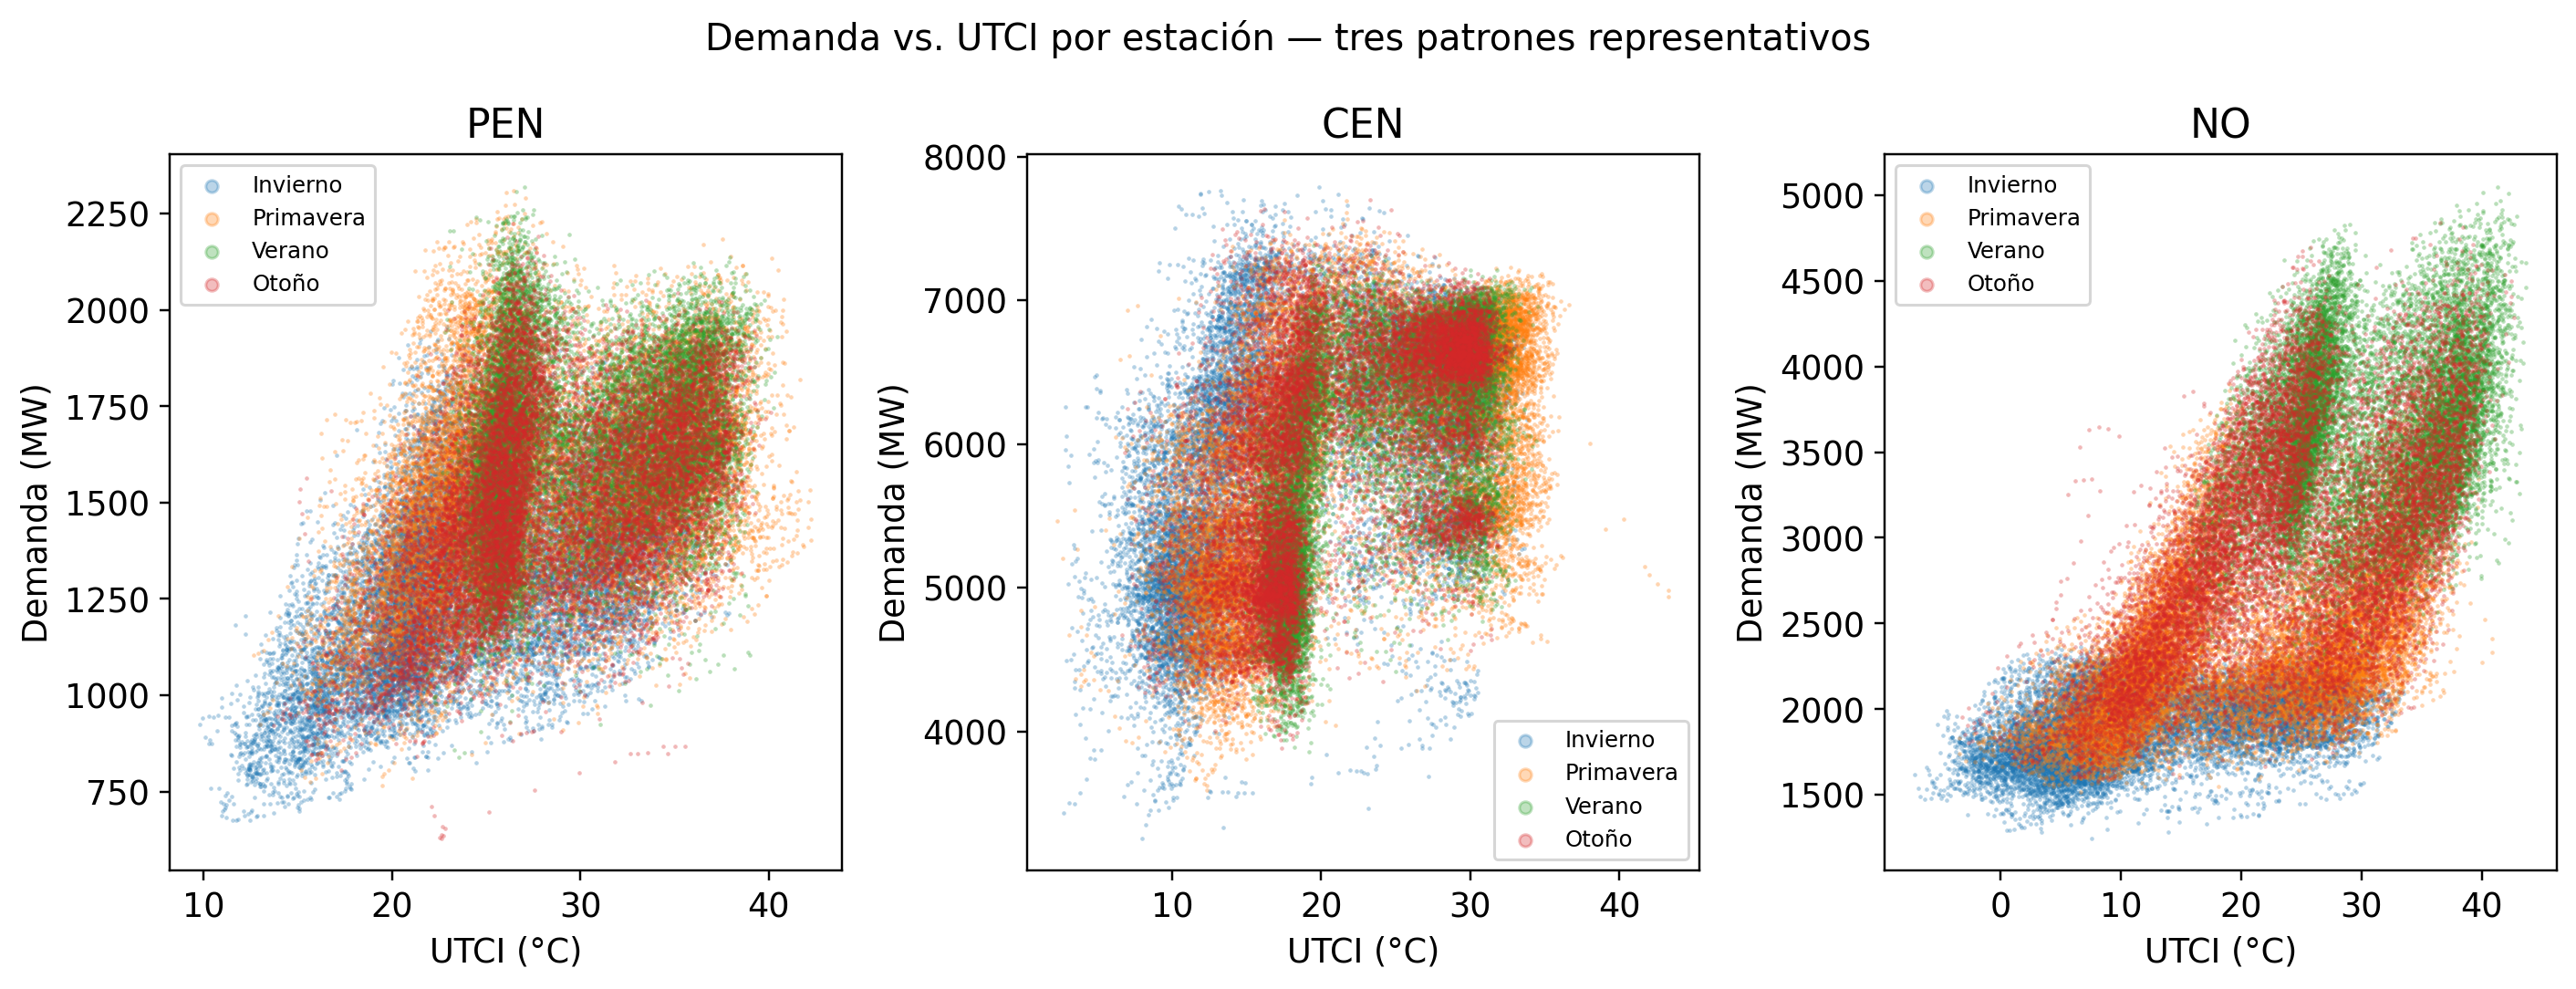

In [14]:
season_map = {12: "Invierno", 1: "Invierno", 2: "Invierno",
              3: "Primavera", 4: "Primavera", 5: "Primavera",
              6: "Verano", 7: "Verano", 8: "Verano",
              9: "Otoño", 10: "Otoño", 11: "Otoño"}
season_colors = {"Invierno": "#1f77b4", "Primavera": "#ff7f0e",
                 "Verano": "#2ca02c", "Otoño": "#d62728"}

regiones["season"] = regiones.index.month.map(season_map)

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
for ax, reg in zip(axes, ["PEN", "CEN", "NO"]):
    for s, color in season_colors.items():
        mask = regiones["season"] == s
        ax.scatter(regiones.loc[mask, f"{reg}_UTCI"],
                   regiones.loc[mask, f"{reg}_DEMANDA"],
                   s=0.3, alpha=0.3, color=color, label=s)
    ax.set_xlabel("UTCI (°C)")
    ax.set_ylabel("Demanda (MW)")
    ax.set_title(reg)
    ax.legend(markerscale=8, fontsize=8)

fig.suptitle("Demanda vs. UTCI por estación — tres patrones representativos", fontsize=13)
plt.tight_layout()
plt.show()

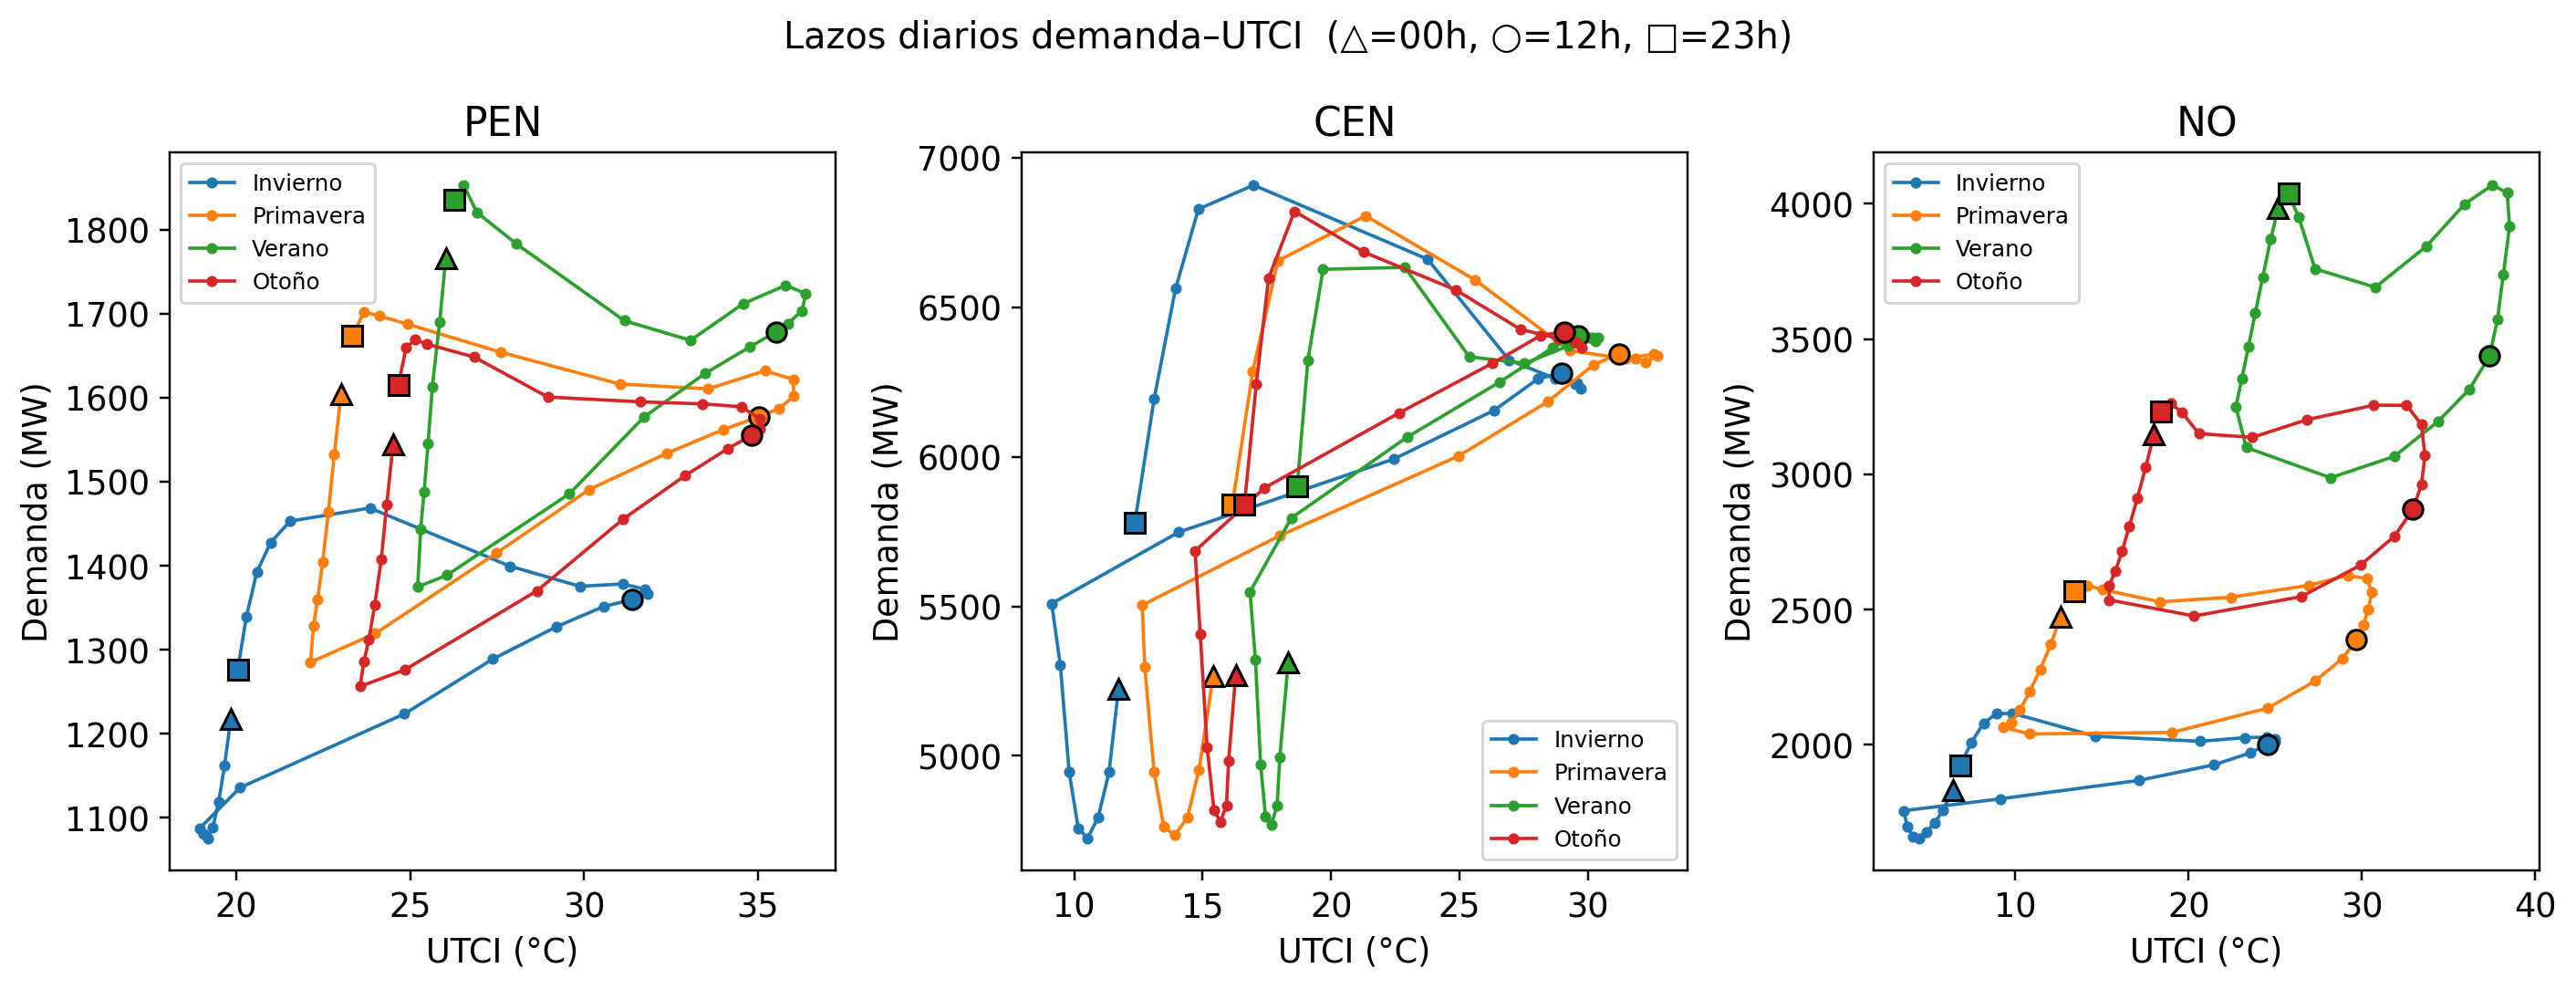

In [15]:
regiones["hour"] = regiones.index.hour

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
for ax, reg in zip(axes, ["PEN", "CEN", "NO"]):
    for s, color in season_colors.items():
        mask = regiones["season"] == s
        hourly = regiones.loc[mask].groupby("hour")[[f"{reg}_UTCI", f"{reg}_DEMANDA"]].mean()
        ax.plot(hourly[f"{reg}_UTCI"], hourly[f"{reg}_DEMANDA"],
                'o-', color=color, label=s, markersize=3, linewidth=1.2)
        # Marcar horas clave
        for h, marker in [(0, "^"), (12, "o"), (23, "s")]:
            if h in hourly.index:
                ax.plot(hourly.loc[h, f"{reg}_UTCI"], hourly.loc[h, f"{reg}_DEMANDA"],
                        marker=marker, color=color, markersize=7, markeredgecolor="black", linewidth=0)
    ax.set_xlabel("UTCI (°C)")
    ax.set_ylabel("Demanda (MW)")
    ax.set_title(reg)
    ax.legend(fontsize=8)

fig.suptitle("Lazos diarios demanda–UTCI  (△=00h, ○=12h, □=23h)", fontsize=13)
plt.tight_layout()
plt.show()

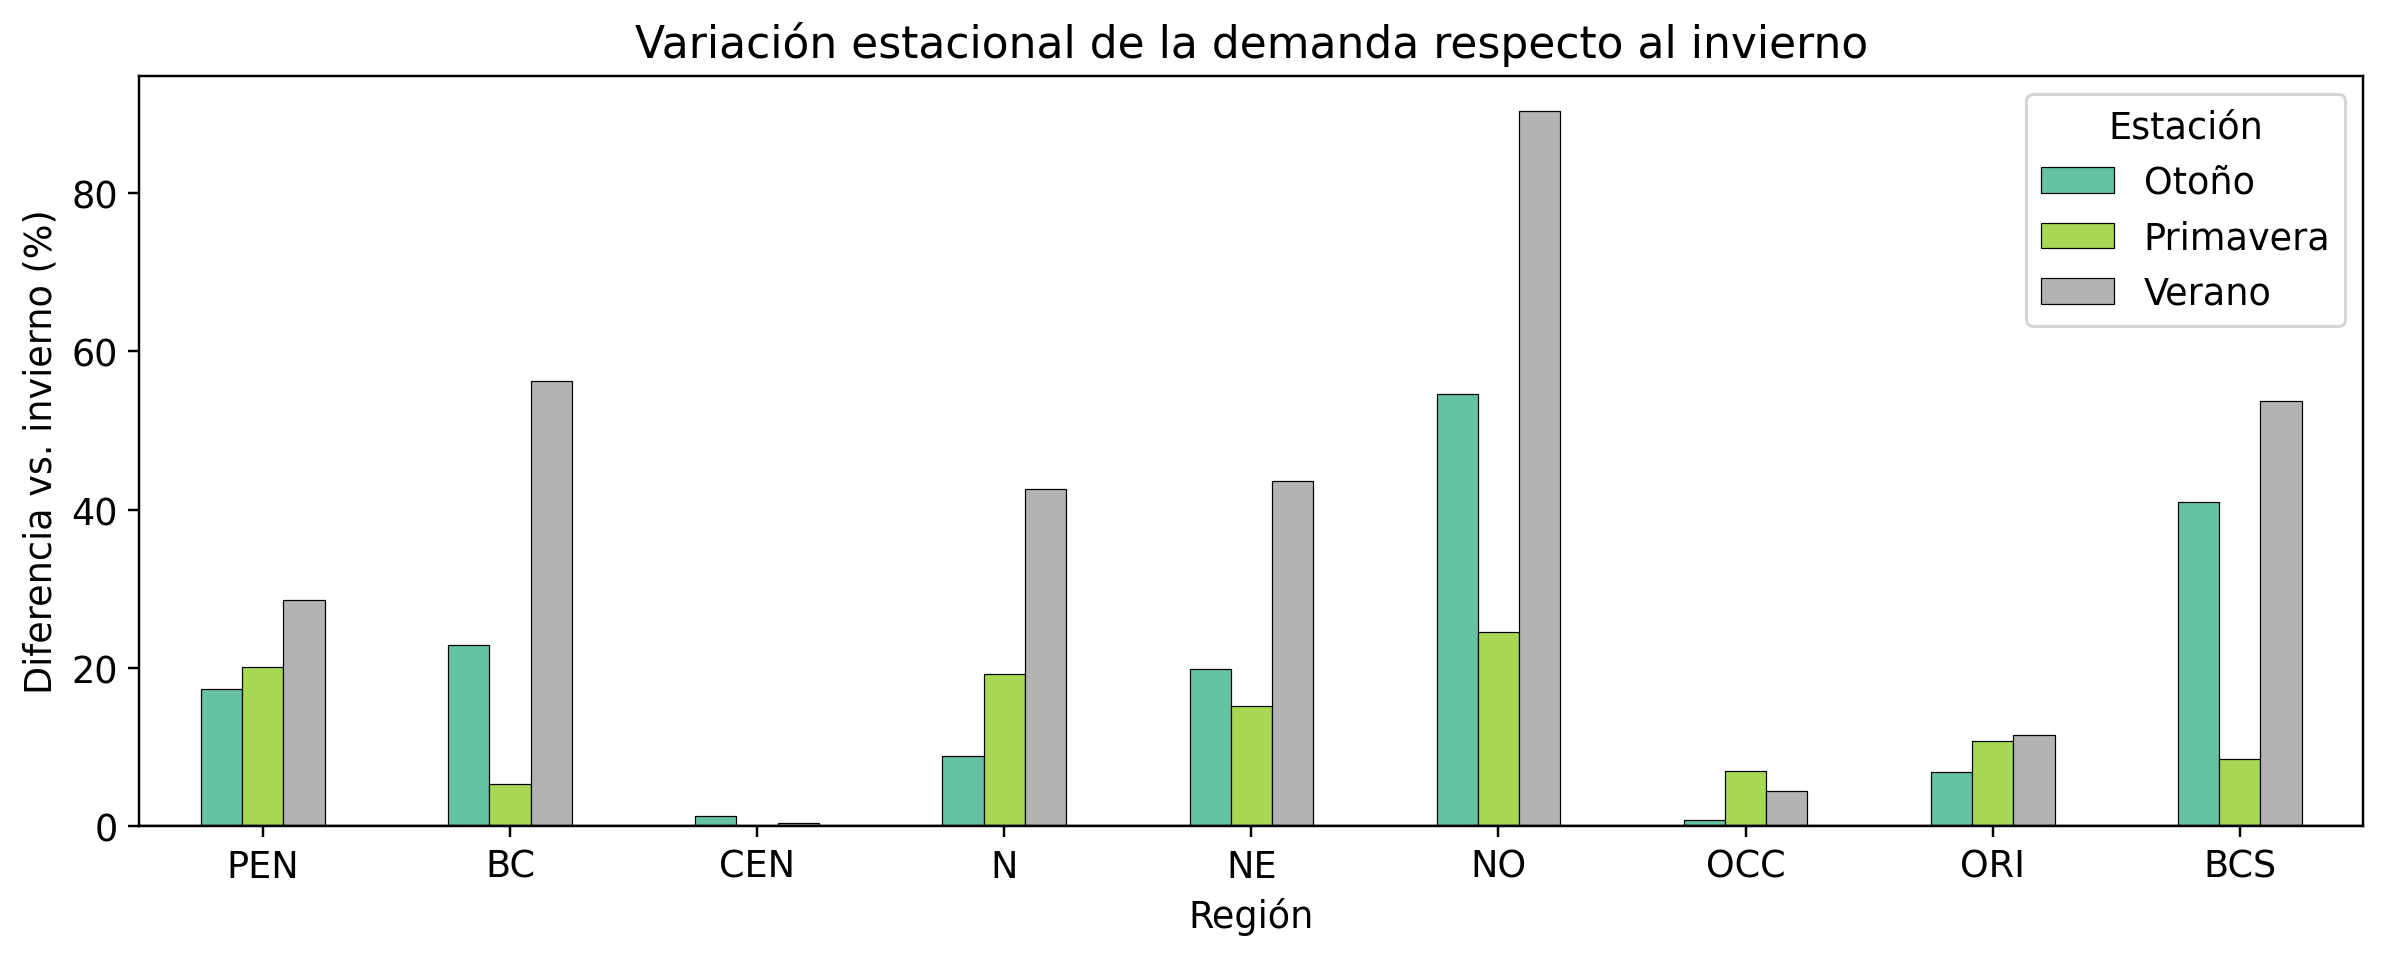

In [16]:
seasonal_dem = regiones.groupby("season")[cols_dem].mean()
winter = seasonal_dem.loc["Invierno"]
pct_dev = ((seasonal_dem - winter) / winter * 100)
pct_dev.columns = [c.replace("_DEMANDA", "") for c in pct_dev.columns]
pct_dev = pct_dev.drop("Invierno")

fig, ax = plt.subplots(figsize=(11, 4.5))
pct_dev.T.plot(kind="bar", ax=ax, colormap="Set2", edgecolor="black", linewidth=0.4)
ax.set_ylabel("Diferencia vs. invierno (%)")
ax.set_title("Variación estacional de la demanda respecto al invierno")
ax.legend(title="Estación")
ax.axhline(0, color="black", linewidth=0.8)
ax.set_xlabel("Región")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()